In [1]:
#importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(dplyr) 
install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [4]:
diabetes_data <- read_csv("https://raw.githubusercontent.com/altonho67/dsci-100-2023w1-group-31/main/data/diabetes_2.csv")
#diabetes_data
set.seed(2020)
diabetes_data <- diabetes_data %>%
                 mutate(Outcome = as.factor(Outcome))|>
                 mutate(Outcome = fct_recode(Outcome, "Diabetes" = "1", "None" = "0")) |>
                 mutate_at(c('SkinThickness','Insulin','BloodPressure','Glucose'), ~na_if(., 0))
                 
head(diabetes_data)
tail(diabetes_data)

#diabetes_split <- initial_split(diabetes_data, prop = 3/4, strata = Outcome)
#diabetes_training <- training(diabetes_split)
#diabetes_testing <- testing(diabetes_split)


#diabetes_vfold <- vfold_cv(diabetes_training, v = 10, strata = Outcome)
#diabetes_vfold

#lm_spec<-linear_reg() |>
#  set_engine("lm") |>
#  set_mode("regression")

#diabetes_recipe <- recipe(Glucose ~ BMI +Age, 
#                        data = diabetes_training) 
  

# use the BMI and Age to predict the glucose
#diabetes_fit <- workflow() |>
#  add_recipe(diabetes_recipe) |>
#  add_model(lm_spec) |>
#  fit(data = diabetes_training)

#diabetes_fit
#this one shows the linear relationship between the BMI and Age with the Glucose, this may not be useful, and can be deleted if you want



Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,Diabetes
1,85,66,29,NA,26.6,0.351,31,None
8,183,64,NA,NA,23.3,0.672,32,Diabetes
1,89,66,23,94,28.1,0.167,21,None
0,137,40,35,168,43.1,2.288,33,Diabetes
5,116,74,NA,NA,25.6,0.201,30,None


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9,89,62,NA,NA,22.5,0.142,33,None
10,101,76,48,180,32.9,0.171,63,None
2,122,70,27,NA,36.8,0.340,27,None
5,121,72,23,112,26.2,0.245,30,None
1,126,60,NA,NA,30.1,0.349,47,Diabetes
1,93,70,31,NA,30.4,0.315,23,None


In [5]:
diabetes_summary <- diabetes_training |>
                 group_by(Outcome) |>
                 summarize(min_Age = min(Age), max_Age = max(Age), mean_Age = mean(Age),
                           min_Insulin = min(Insulin), max_Insulin = max(Insulin), mean_Insulin = mean(Insulin),
                           min_SkinThickness = min(SkinThickness), max_SkinThickness = max(SkinThickness), mean_SkinThickness = mean(SkinThickness),
                           min_BMI = min(BMI), max_BMI = max(BMI), mean_BMI = mean(BMI),
                           min_BloodPressure = min(BloodPressure), max_BloodPressure = max(BloodPressure), mean_BloodPressure = mean(BloodPressure),
                           min_DiabetesPedigreeFunction = min(DiabetesPedigreeFunction), max_DiabetesPedigreeFunction = max(DiabetesPedigreeFunction), mean_DiabetesPedigreeFunction = mean(DiabetesPedigreeFunction),
                           n_of_patients = n())
diabetes_summary


Outcome,min_Age,max_Age,mean_Age,min_Insulin,max_Insulin,mean_Insulin,min_SkinThickness,max_SkinThickness,mean_SkinThickness,min_BMI,max_BMI,mean_BMI,min_BloodPressure,max_BloodPressure,mean_BloodPressure,min_DiabetesPedigreeFunction,max_DiabetesPedigreeFunction,mean_DiabetesPedigreeFunction,n_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
None,21,81,31.41333,NA,NA,NA,NA,NA,NA,0,57.3,30.20880,NA,NA,NA,0.084,2.329,0.4439627,375
Diabetes,21,66,36.33333,NA,NA,NA,NA,NA,NA,0,67.1,35.55672,NA,NA,NA,0.088,2.420,0.5581891,201


In [8]:
diabetes_split <- initial_split(diabetes_data, prop = 3/4, strata = Outcome)
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)



Warning message:
“Removed 278 rows containing missing values (`geom_point()`).”


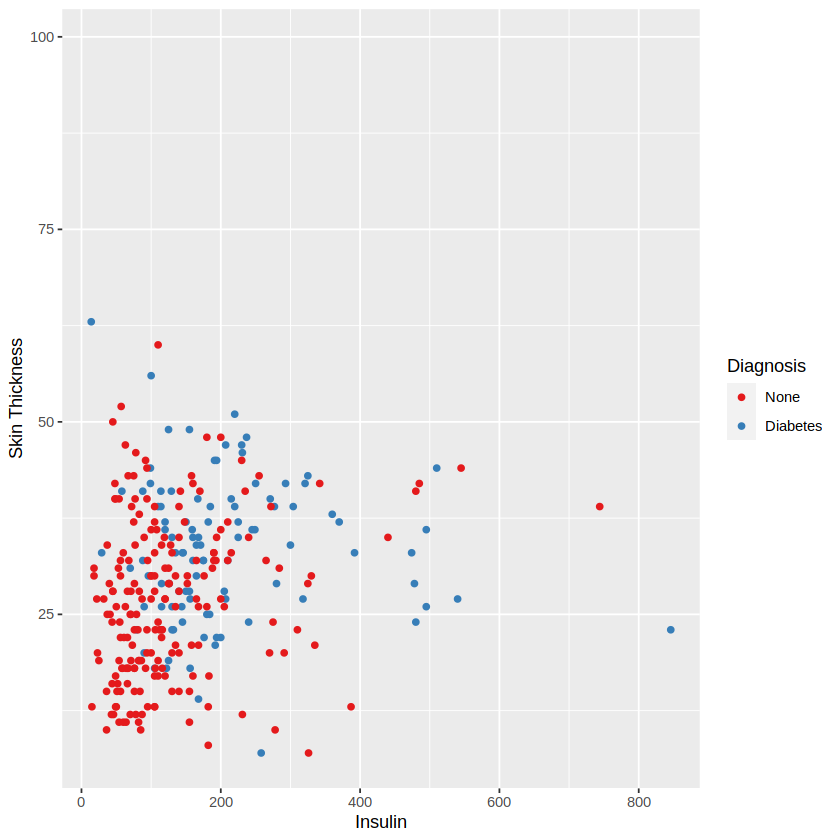

Warning message:
“Removed 21 rows containing missing values (`geom_point()`).”


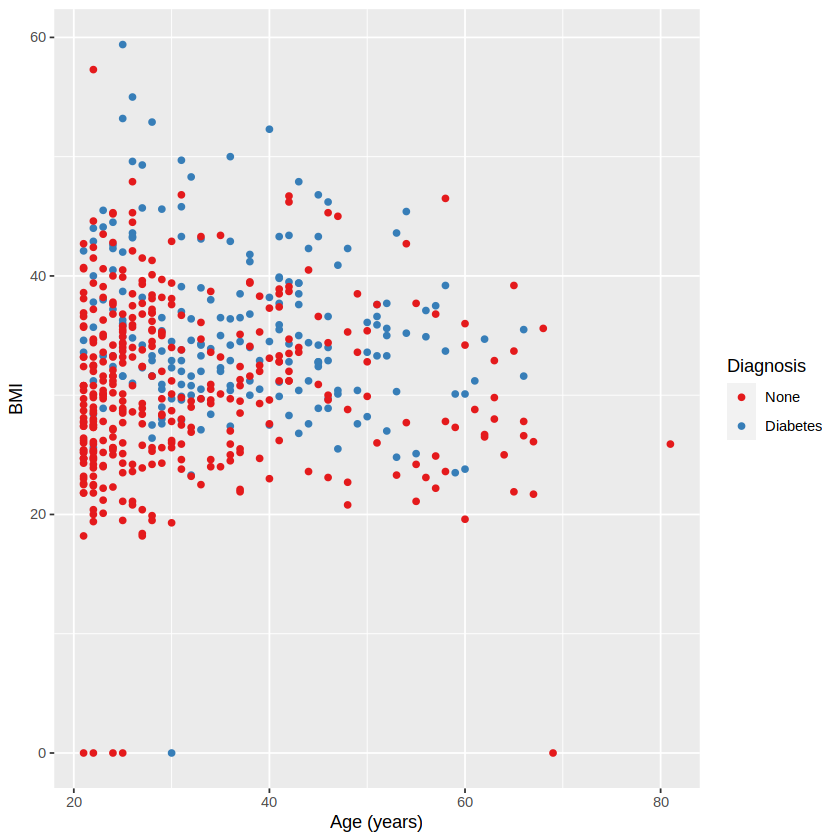

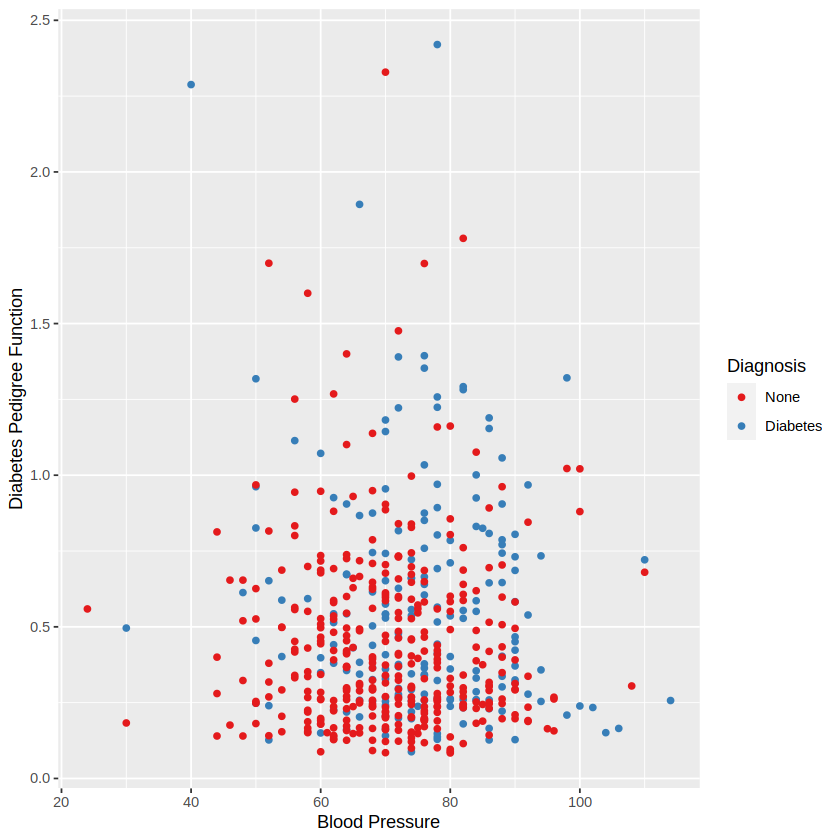

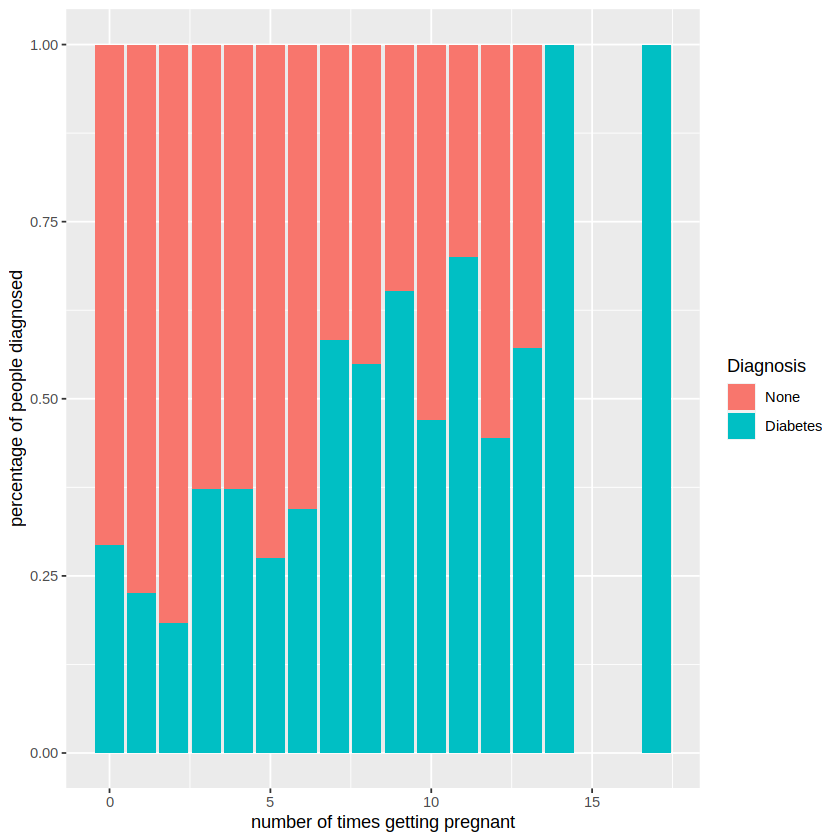

In [10]:
plot1 <- ggplot(diabetes_training, aes(x = Insulin, y = SkinThickness, color = Outcome)) +
                 geom_point() +
                 labs(x = "Insulin", y = "Skin Thickness", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(diabetes_training, aes(x = Age, y = BMI, color = Outcome)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "BMI", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot3 <- ggplot(diabetes_training, aes(x = BloodPressure, y = DiabetesPedigreeFunction, color = Outcome)) +
                 geom_point() +
                 labs(x = "Blood Pressure", y = "Diabetes Pedigree Function", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")
plot4 <- ggplot(diabetes_training, aes(x = Pregnancies, fill = Outcome,na.rm=TRUE)) +
                 geom_bar(position="fill") +
                 labs(x = "number of times getting pregnant", y = "percentage of people diagnosed", fill = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")


plot1
plot2
plot3
plot4

In [26]:
#Standardization
diabetes_recipe <- recipe(Outcome ~ Glucose + BMI + Age, data = diabetes_training)|>
step_scale(all_predictors())|>
step_center(all_predictors())

#Using Knn Model
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

# 5 fold cross validation
diabetes_vfold <- vfold_cv(diabetes_training, v = 5, strata = Outcome)

grid_vals <- tibble(neighbors = c(1:50))

#workflow
knn_result <- workflow()|>
add_recipe(diabetes_recipe)|>
add_model(knn_tune)|>
tune_grid(resamples = diabetes_vfold, grid = grid_vals)

#filter for the most accurate neighbor amount (k-value)
accuracy <- knn_result|>
collect_metrics()|>
filter(.metric == "accuracy")|>
select(neighbors, mean)|>
arrange(desc(mean))


head(accuracy)

x Fold2: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 114 or 1, not 115.

x Fold4: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 114 or 1, not 115.



neighbors,mean
<int>,<dbl>
11,0.7861569
12,0.7861569
45,0.7861319
46,0.7861319
37,0.7775112
38,0.7775112


Diabetes_outcome_predictions
#this is the knn neighbor prediction of DIabetes outcome using BMI, Glucose and Age, as these three show a positive relationship with diabetes outcome in the proposal, so I am using them to approximate the outcome. More can be added, such as choosing the best k for knn spec and use vfold.


A k-value of 11 or 12 will give us 78.6% accuracy. A Visualization is below.

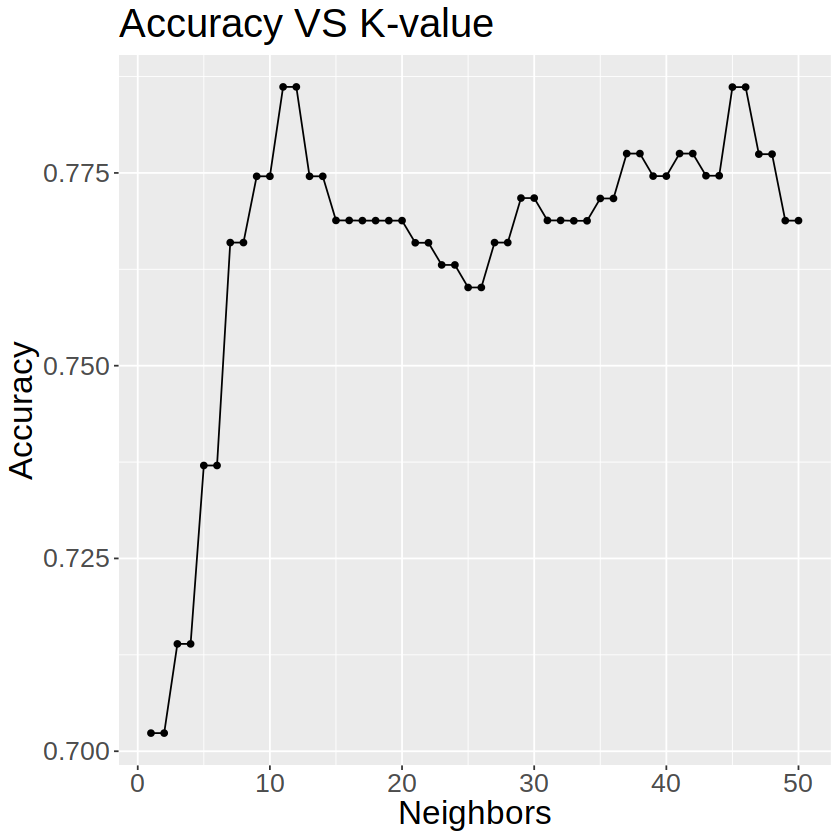

In [28]:
accuracy_vs_k_plot <- accuracy|>
ggplot(aes(x = neighbors, y = mean))+
geom_point()+
geom_line()+
labs(x = "Neighbors", y = "Accuracy", title = "Accuracy VS K-value")+
theme(text = element_text(size = 20))

accuracy_vs_k_plot

In [31]:
set.seed(2020)

diabetes_recipe <- recipe(Outcome ~ Glucose + BMI + Age, data = diabetes_training)|>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12)|>
set_engine("kknn")|>
set_mode("classification")

diabetes_fit <- workflow()|>
add_recipe(diabetes_recipe)|>
add_model(knn_spec)|>
fit(data = diabetes_training)

diabetes_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.228223
Best kernel: rectangular
Best k: 12